**Your name: MPHO DAMANE**<br>
**Your student number: 56913192**        <br>
**Your email address: 56913192@mylife.unisa.ac.za**         <br>

In [19]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd

In [24]:
# Load dataset
dataset=pd.read_csv('Wine dataset.csv')

In [27]:
# summarize the data
# shape
print(dataset.shape)

(178, 14)


In [28]:
# head
print(dataset.head(20))

    class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
5       1    14.20        1.76  2.45               15.2        112   
6       1    14.39        1.87  2.45               14.6         96   
7       1    14.06        2.15  2.61               17.6        121   
8       1    14.83        1.64  2.17               14.0         97   
9       1    13.86        1.35  2.27               16.0         98   
10      1    14.10        2.16  2.30               18.0        105   
11      1    14.12        1.48  2.32               16.8         95   
12      1    13.75        1.73  2.41               16.0         89   
13      1    14.75  

In [29]:
# descriptions
print(dataset.describe())

            class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000   

In [30]:
# class distribution
print(dataset.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


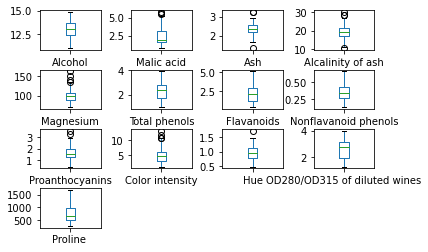

In [68]:
# visualize the data
# box and whisker plots
import matplotlib.pyplot as plt
data_box = dataset.iloc[:,1:]
data_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
pyplot.show()

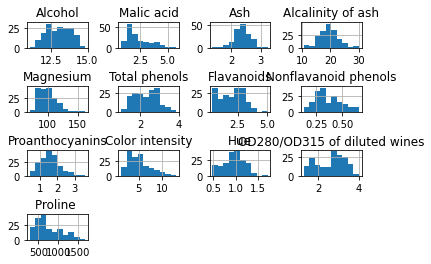

In [80]:
# histograms
data_box.hist()
plt.subplots_adjust(wspace=0.5, hspace=1.5)#adjust space for clarity
pyplot.show()

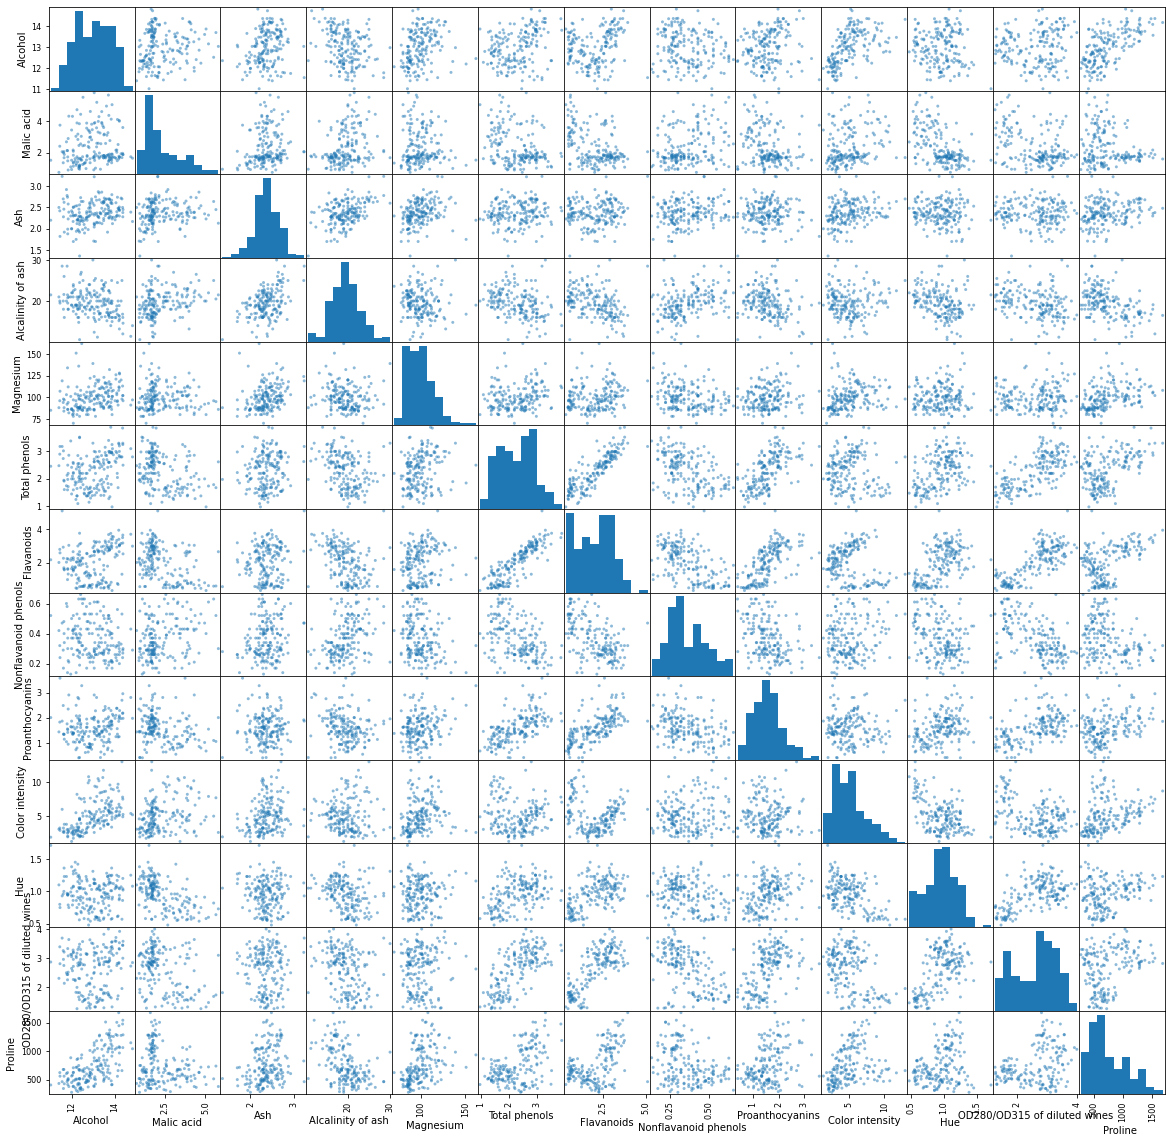

In [84]:
# scatter plot matrix, increase the size for clarity
scatter_matrix(data_box,figsize=(20, 20))
pyplot.show()

In [85]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:]
y = array[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


In [86]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.971429 (0.034993)
LDA: 0.986190 (0.027640)
KNN: 0.697143 (0.115041)
CART: 0.930000 (0.043750)
NB: 0.971905 (0.034434)
SVM: 0.450952 (0.057422)


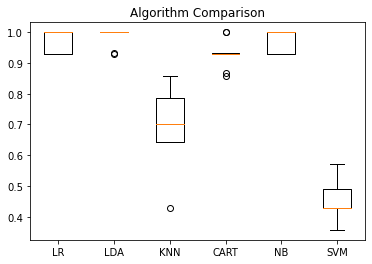

In [87]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [88]:
#LDA is the most accurate model, so we choose this one
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [89]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        13
         3.0       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

